In [24]:
import numpy as np
from sklearn import datasets
%matplotlib inline
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data)) # this create a permutation of the 
        # of numbers from 0 to # of rows of iris and stores in a list
x_train = x[i[0:-10]] #all entries except last 10 are training
y_train = y[i[0:-10]] # target values
x_test  = x[i[-10:]] #last 10 values are test value
y_test =  y[i[-10:]] #target test value

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) #fitting the model

#prediction
print("Predict Output", knn.predict(x_test)) #model is built in knn object
#Acutal output
print("Actual Output" , y_test)
print(knn.predict(x_test)==y_test)

# 1 entry is classified errorneously. 10% error rate

Predict Output [1 2 1 0 0 0 2 1 2 0]
Actual Output [1 1 1 0 0 0 2 1 2 0]
[ True False  True  True  True  True  True  True  True  True]


(1.5, 4.900000000000003)

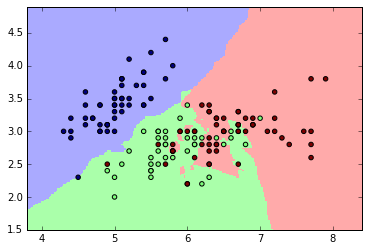

In [78]:
#Visualizing the decision boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()

x = iris.data[:,:2] #Sepal length and width
y = iris.target #Species of flowers

x_min, x_max = x[:,0].min()-0.5,x[:,0].max()+0.5 #the min max is used for
                    #plotting
y_min, y_max = x[:,1].min()-0.5,x[:,1].max()+0.5 # the y is not related to 
                    # the y in target set, but is just needed for plotting
                    # the graph

        
#Mesh
cmap_light = ListedColormap(['#AAAAFF',"#AAFFAA","#FFAAAA"])
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

    ##meshgrid is basically intermediate values in x and y axis for which
    # we have to calcualte the value of function f(x,y); in this case
    # it is the class

    #xx contains a range for values from x axis
    #yy contains range of value from y axis.
    # now xx unraveled is just a list of values in x axis and similarly yy
    # meshgrid just produces a cross*product
knn = KNeighborsClassifier()
knn.fit(x,y) #model is built using classifier
z= knn.predict(np.c_[xx.ravel(),yy.ravel()]) #apply the model to points 
                #generated on the mesh
#z contains the prediction values 

z = z.reshape(xx.shape) #why  ?

#plotting
plt.figure()
plt.pcolormesh(xx,yy,z,cmap = cmap_light)

#plot training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [34]:
np.meshgrid([1,2,3],[9,10,11])#what does meshgrid do.
print(xx,yy, z)

[[ 3.8  4.8]
 [ 3.8  4.8]
 [ 3.8  4.8]
 [ 3.8  4.8]] [[ 1.5  1.5]
 [ 2.5  2.5]
 [ 3.5  3.5]
 [ 4.5  4.5]] [[1 1]
 [0 1]
 [0 0]
 [0 0]]


In [23]:
print(xx.ravel())
print(yy.ravel())
np.c_[xx.ravel(),yy.ravel()] #combines the values of the array 
xx.shape

[ 3.8  4.8  3.8  4.8  3.8  4.8  3.8  4.8]
[ 1.5  1.5  2.5  2.5  3.5  3.5  4.5  4.5]


(4, 2)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000E107854C80> (for post_execute):


ValueError: to_rgba: Invalid rgba arg "AAAAFF"
to_rgb: Invalid rgb arg "AAAAFF"
could not convert string to float: 'aaaaff'

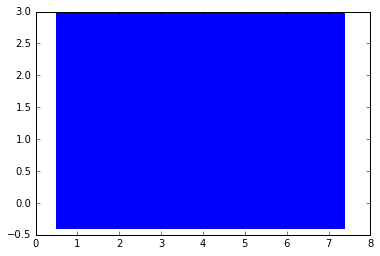

In [77]:
#The same thing can be done for petals as well.

#store the value of petals
x = iris.data[:,2:4] #Petal length and width
z = iris.target

#CANNOT USE THE BELOW CODE BECAUSE xx AND yy HAVE DIFFERENT LENGTHS
#combined the expanded x and y coordinates
#u  = np.zeros((len(xx),2))
#u[:,0] = xx.transpose()
#u[:,1] = yy.transpose()
#knn = KNeighborsClassifier
#knn.fit(x,z)
x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+0.5

xx,yy = np.meshgrid(np.arange(x_min , x_max,0.02),np.arange(y_min, y_max,0.02))

#MESH
cmap_light = ListedColormap(["AAAAFF","AAFFAA","FFAAAA"])
knn = KNeighborsClassifier()
knn.fit(x,z)

u = knn.predict(np.c_[xx.ravel(),yy.ravel()])
u = u.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy, u, cmap = cmap_light)









In [72]:
xx.shape

(120, 295)